In [1]:
#SVM with non linear seperable data without soft margin

     pcost       dcost       gap    pres   dres
 0: -5.3831e-01 -6.6686e-01  1e+02  1e+01  1e+00
 1: -4.4484e-02 -2.0657e-03  2e+00  2e-01  2e-02
 2: -1.1008e-03 -8.5918e-04  5e-02  5e-03  6e-04
 3:  3.4474e-05 -6.8917e-04  8e-04  1e-05  1e-06
 4: -1.4955e-04 -2.5658e-04  1e-04  2e-20  4e-16
 5: -1.8615e-04 -2.2719e-04  4e-05  3e-20  3e-16
 6: -1.9981e-04 -2.2677e-04  3e-05  8e-20  3e-16
 7: -2.2124e-04 -2.2263e-04  1e-06  3e-20  3e-16
 8: -2.2212e-04 -2.2213e-04  1e-08  9e-20  3e-16
Optimal solution found.
4 support vectors out of 75 points
14 out of 25 predictions correct
ACCURACY BY FUNCTION 0.68
ACCURACY BY MY FUNCTION 0.56


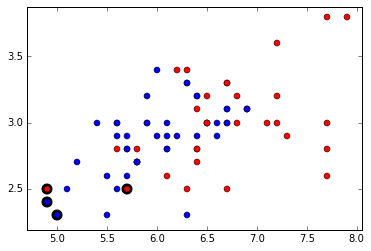

In [4]:
import numpy as np
import math as m
from sklearn import metrics
import sklearn
from sklearn.cross_validation import KFold
import urllib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import cvxopt as cv
import pandas as pd
from sklearn import svm
import cvxopt.solvers
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]
def main():
    iris = load_iris()
    X1 = iris.data
    y1 = iris.target
    X = iris.data[50:150:,0:2] 
    y = iris.target[50:150]
    for i in range(len(y)):
        if y[i]==2:
            y[i]=-1
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#     print X_train[:,0]
    x_train1= pd.DataFrame(columns=(range(2)))
    x_train2= pd.DataFrame(columns=(range(2)))
    for i in range(len(X_train)):
        if y_train[i]==-1:
            x_train1.loc[i]=X_train[i]
        elif y_train[i]==1:
            x_train2.loc[i]=X_train[i]
    x_train1= np.matrix(x_train1)
    x_train2= np.matrix(x_train2)
   
    n_samples, n_features = X_train.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = np.dot(X[i], X[j])

    m= np.dot(y_train, y_train.T)
    b=np.dot(X_train,X_train.T)
    P= cv.matrix(np.dot(m,b))
#     P = cv.matrix(np.outer(y_train,y_train) * K)
#     q=np.full(n_samples, -1)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    h = cv.matrix(np.zeros(n_samples))
    G = cv.matrix(np.diag(np.ones(n_samples) * -1))
    A= cv.matrix(y_train.astype(float),(1,n_samples))
    b=cv.matrix(0.0)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    L = np.ravel(solution['x'])
#     print L
    sv = L > 1e-9
    ind = np.arange(len(L))[sv]
    L = L[sv]
    sv_x = X_train[sv]
    sv_y = y_train[sv]
    print "%d support vectors out of %d points" % (len(L), n_samples)
    b = 0
    for n in range(len(L)):
        b += sv_y[n]
#         print a.dtype,sv_y.astype(float).dtype, sv_y.dtype, K[ind[n].astype(int),sv.astype(int)].T.dtype
#         b = b- np.sum(np.dot(L, np.dot(sv_y, K[ind[n].astype(int),sv.astype(int)].T)))
        b -= np.sum(L * sv_y * K[ind[n],sv])
#         b=b-m
    b /= len(L)

    # Weight vector
    
    w = np.zeros(n_features)
    for n in range(len(L)):
        w += L[n] * sv_y[n] * sv_x[n]
    y_pred= np.sign(np.dot(X_test, w) + b)
    correct = np.sum(y_pred == y_test)
    print "%d out of %d predictions correct" % (correct, len(y_pred))
    d=pd.DataFrame(columns=('y_test','y_pred'))
    for i in range(len(y_test)):
        d.loc[i]=(y_test[i],y_pred[i])
#     print d
    clf = svm.SVC()
    clf.fit(X_train, y_train) 
    sv1=clf.support_vectors_
    fun_pred=clf.predict(X_test)
    Fun_Accuracy = metrics.accuracy_score(y_test, fun_pred)
    print "ACCURACY BY FUNCTION", Fun_Accuracy
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    print "ACCURACY BY MY FUNCTION", Accuracy
    plt.plot(x_train1[:,0], x_train1[:,1], "ro")
    plt.plot(x_train2[:,0], x_train2[:,1], "bo")
    plt.scatter(sv_x[:,0], sv_x[:,1], s=100, c="black")

#     # w.x + b = 0
#     a0 = -4; a1 = f(a0, w, b)
#     b0 = 4; b1 = f(b0, w, b)
#     plt.plot([a0,b0], [a1,b1], "k")

#     # w.x + b = 1
#     a0 = -4; a1 = f(a0, w, b[1], 1)
#     b0 = 4; b1 = f(b0, w, b[1], 1)
#     plt.plot([a0,b0], [a1,b1], "k--")

#         # w.x + b = -1
#         a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
#         b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
#         pl.plot([a0,b0], [a1,b1], "k--")

    plt.axis("tight")
    plt.savefig("non-seperable-withoutsoft.png")
    plt.show()
    
#     print clf.n_support_ 
#     print y_pred


    
if __name__ == "__main__":main()